In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('axes',titlesize=30)
plt.rc('axes',labelsize=30)
plt.rc('font',size=10)
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.rc('legend',fontsize= 15)
pd.set_option('display.max_row', 50000)
plt.rc('font',family='NanumGothic')
mpl.rcParams['axes.unicode_minus']=False
%config InlineBackend.figure_format='retina'

In [2]:
import folium
import json
from folium import plugins
from folium.features import DivIcon

In [3]:
######## dataset 불러오기
df = pd.read_csv('야놀자!/통합_data/경북통합.csv',sep=',',encoding='utf8')
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          1473 non-null   object 
 1   score         1473 non-null   float64
 2   loc           1473 non-null   object 
 3   lowest_price  1473 non-null   float64
 4   category      1473 non-null   object 
 5   loc2          1473 non-null   object 
 6   SIG_CD        1473 non-null   int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 80.7+ KB


In [5]:
print('경북 숙박업소 개수 : ', len(df))
print('경북 숙밥업소 모텔 개수 : ', (df['category']=='m').sum())
print('경북 숙밥업소 호텔 개수 : ', (df['category']=='h').sum())
print('경북 숙밥업소 팬션 개수 : ', (df['category']=='p').sum())
print('경북 숙밥업소 게스트하우스 개수 : ', (df['category']=='g').sum())

경북 숙박업소 개수 :  1473
경북 숙밥업소 모텔 개수 :  511
경북 숙밥업소 호텔 개수 :  63
경북 숙밥업소 팬션 개수 :  756
경북 숙밥업소 게스트하우스 개수 :  143


In [6]:
total = len(df)
mtotal = (df['category']=='m').sum()
htotal = (df['category']=='h').sum()
ptotal = (df['category']=='p').sum()
gtotal = (df['category']=='g').sum()

In [7]:
### sort
dfc1 = df.sort_values(by=['category'])

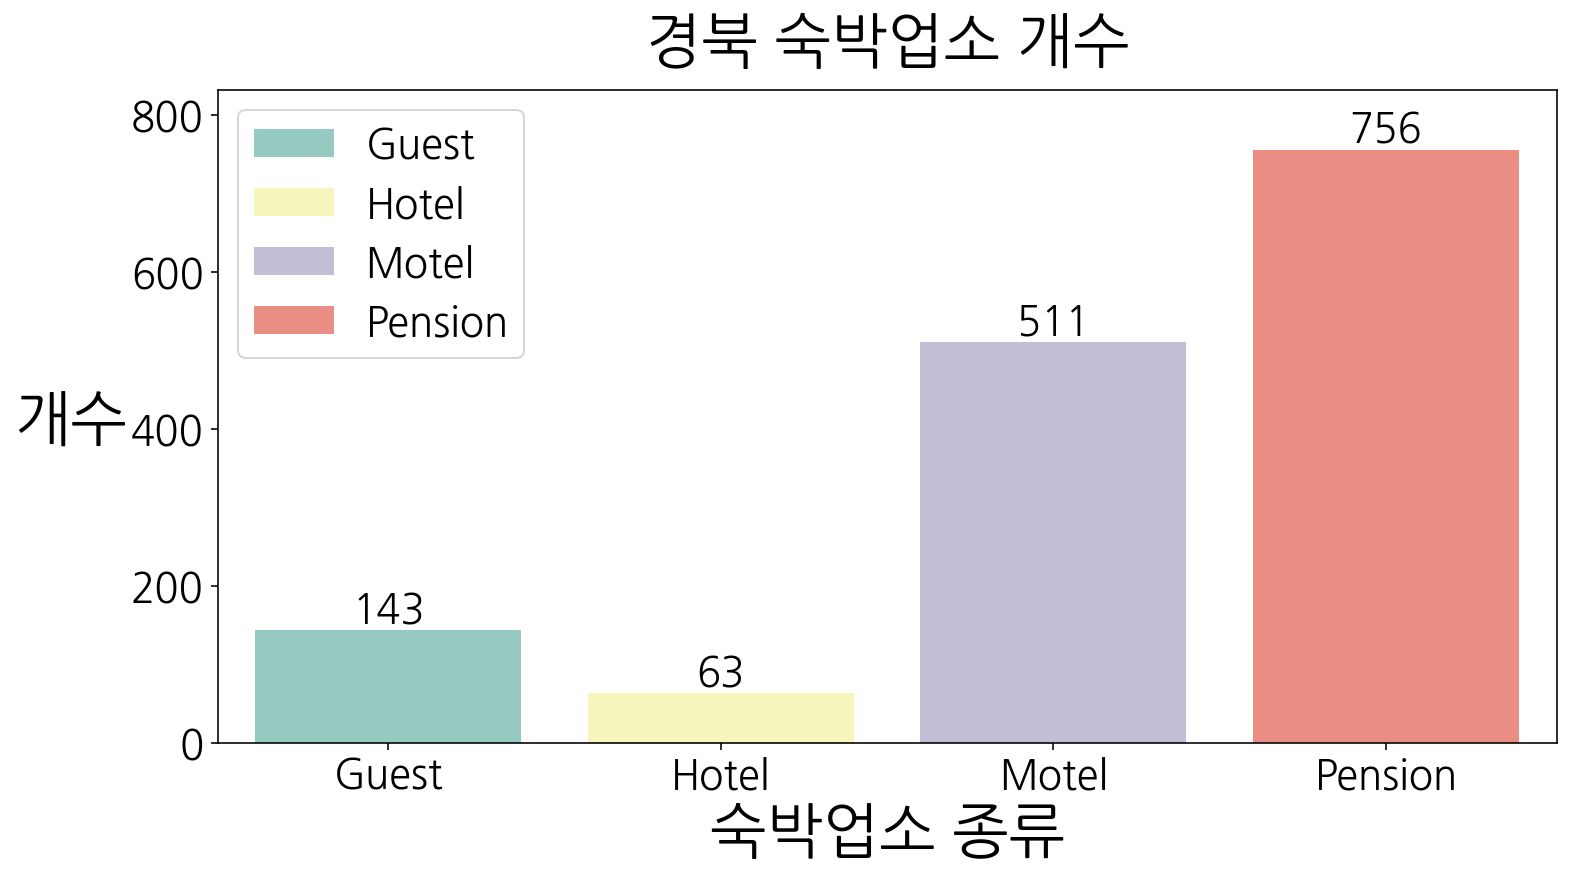

In [21]:
################### 경북 숙박업소 개수 그래프
ax = plt.figure(figsize=(12,6))
ax = sns.countplot(data = dfc1, x='category',hue = 'category',palette='Set3',dodge=False)
ax.set_title('경북 숙박업소 개수',
            pad=15.0)
ax.set_xlabel('숙박업소 종류')
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(['Guest','Hotel','Motel','Pension'])
ax.set_ylabel('개수',rotation=0,labelpad=30,position=(0,0.45,0))
plt.legend(labels=['Guest','Hotel','Motel','Pension'],fontsize=20)
plt.text(0,gtotal,gtotal,fontsize=20,color='black',
             horizontalalignment='center',
             verticalalignment='bottom')
plt.text(1,htotal,htotal,fontsize=20,color='black',
             horizontalalignment='center',
             verticalalignment='bottom')
plt.text(2,mtotal,mtotal,fontsize=20,color='black',
             horizontalalignment='center',
             verticalalignment='bottom')
plt.text(3,ptotal,ptotal,fontsize=20,color='black',
             horizontalalignment='center',
             verticalalignment='bottom')
plt.margins(0.03, 0.1)
plt.show()
#plt.savefig('경북 숙박업소 개수.png',bbox_inches='tight', pad_inches=0.5) 

In [8]:
########### 지도 시각화용 dataset
df2=df.groupby(df['loc2']).mean()
df2.reset_index(level=['loc2'],inplace=True)
df_count=df.groupby('loc2').size()
df_count.reset_index(drop=True,inplace=True)
df2['count']=df_count
df2 = df2.sort_values(by='lowest_price',ascending=False)
df2.reset_index(drop=True,inplace=True)
df2['SIG_CD'] = df2['SIG_CD'].astype(str)

In [45]:
ppos =pd.DataFrame(['경주','울진','울릉도','포항/남구','포항/북구','문경/상주..','안동','영천/청도','김천/칠곡..','경산','구미'])

In [46]:
ppos

,0
0,경주
1,울진
2,울릉도
3,포항/남구
4,포항/북구
5,문경/상주..
6,안동
7,영천/청도
8,김천/칠곡..
9,경산


In [47]:
df2['loc3'] = ppos

In [20]:
len(ppos)

11

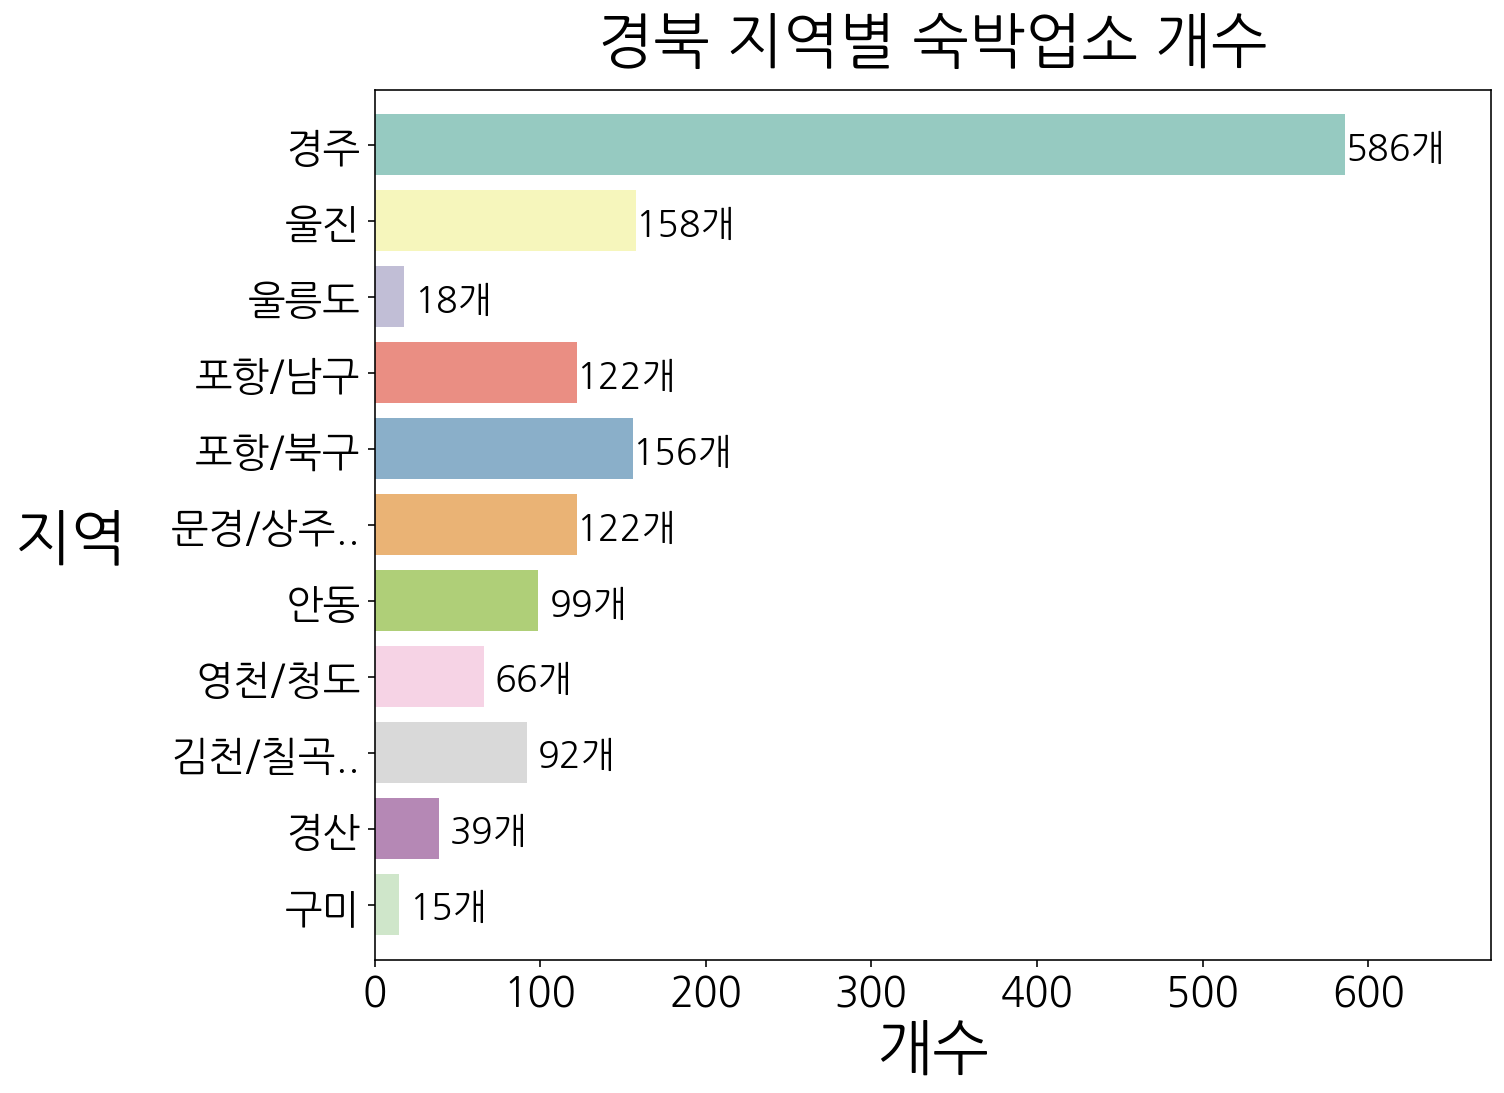

In [62]:
############## 경북 지역별 숙박업소 개수
ax = plt.figure(figsize=(10,8))
ax = sns.barplot(data = df2, x='count', y = 'loc3',palette='Set3')
ax.set_title('경북 지역별 숙박업소 개수',
            pad=15.0)
ax.set_xlabel('개수')
ax.set_ylabel('지역',rotation=0,position=(0,0.45,0),labelpad=50)
for p in ax.patches:
    ax.annotate(f'\n{int(p.get_width())}개', (p.get_width()+30,p.get_y()-0.3), ha='center', va='top', color='black', size=18)
plt.margins(0.15, 0.03)
#plt.show()
plt.savefig('경북 지역별 숙박업소 개수.png',bbox_inches='tight', pad_inches=0.5) 

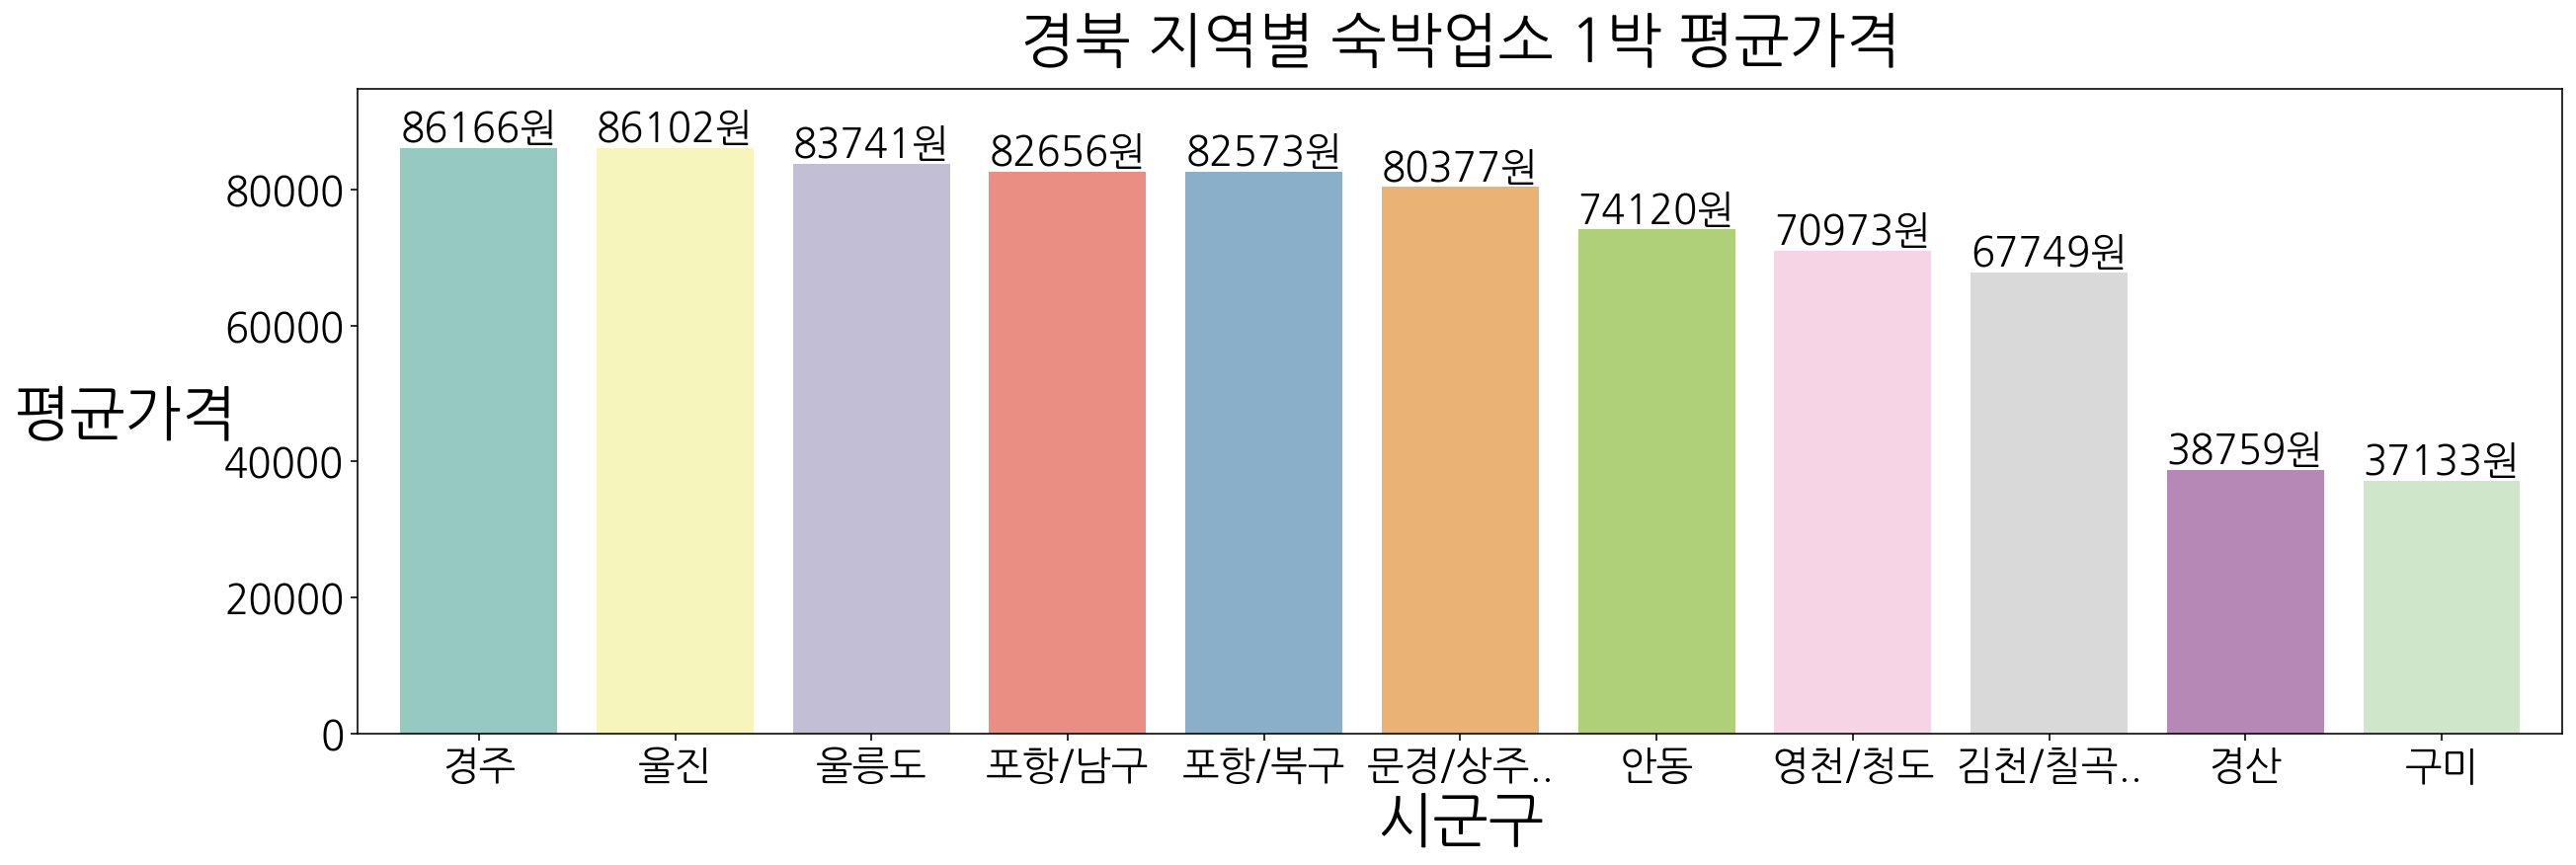

In [66]:
############## 경북 지역별 평균숙박업소 가격 그래프
########## 모든 업소의 최저가격을 가지고 추산한 것임으로 종합 가격 평균은 아님.
ax = plt.figure(figsize=(20,6))
ax = sns.barplot(data = df2, x='loc3', y = 'lowest_price',palette='Set3')
ax.set_title('경북 지역별 숙박업소 1박 평균가격',
            pad=15.0)
ax.set_xlabel('시군구')
ax.set_ylabel('평균가격',rotation=0,labelpad=50,position=(0,0.45,0))
for i in range(len(df2)):
    plt.text(i,round(df2.iloc[i][2]),str(round(df2.iloc[i][2]))+'원',fontsize=20,color='black',
             horizontalalignment='center',
             verticalalignment='bottom')
plt.xticks(rotation=0)
plt.margins(0.02, 0.1)
#plt.show()
plt.savefig('경북 지역별 숙박업소 1박 평균가격.png',bbox_inches='tight', pad_inches=0.5) 

In [41]:
df2

,loc2,score,lowest_price,SIG_CD,count
0,경주(보문단지/황리단길/불국사/양남/감포/안강),4.377645,86165.894198,47130,586
1,울진/영덕/청송,4.324684,86101.544304,47750,158
2,울릉도,3.911111,83740.888889,47940,18
3,포항/남구(시청/시외버스터미널/구룡포/쌍사/문덕/오천),4.393443,82656.327869,47111,122
4,포항/북구(영일대/죽도시장/여객터미널/송도),4.453846,82572.717949,47113,156
5,문경/상주/영주/예천/군위/의성/봉화,4.285246,80377.270492,47210,122
6,안동(경북도청/하회마을),4.320202,74120.202020,47170,99
7,영천/청도,4.462121,70972.515152,47230,66
8,김천/칠곡/성주,4.354348,67749.152174,47150,92
9,경산(영남대/대구대/갓바위/하양/진량/자인),4.558974,38758.564103,47290,39


In [42]:
m = folium.Map(location=[34.8, 128.6],zoom_start=8
            )
state_geo = 'final.zip.geojson'
state_geo2 = json.load(open(state_geo,encoding='utf8'))
folium.Choropleth(geo_data=state_geo2,data=df2,columns=('SIG_CD','lowest_price'),
                              key_on='feature.properties.SIG_CD',fill_color='YlOrRd',legend_name='평균 가격').add_to(m)
folium.Marker([35.847955044813034, 129.21435269008677],tooltip = df2['loc2'][0]+' : '+str(int(df2['lowest_price'][0]))+'원').add_to(m)
folium.Marker([36.56557321689937, 129.33668136615128],tooltip = df2['loc2'][1]+' : '+str(int(df2['lowest_price'][1]))+'원').add_to(m)
folium.Marker([37.504960944189996, 130.8538933222524],tooltip = df2['loc2'][2]+' : '+str(int(df2['lowest_price'][2]))+'원').add_to(m)
folium.Marker([35.95562853735916, 129.45923765720138],tooltip = df2['loc2'][3]+' : '+str(int(df2['lowest_price'][3]))+'원').add_to(m)
folium.Marker([36.14500717704305, 129.27607988031323],tooltip = df2['loc2'][4]+' : '+str(int(df2['lowest_price'][4]))+'원').add_to(m)
folium.Marker([36.566154055282546, 128.271106444046],tooltip = df2['loc2'][5]+' : '+str(int(df2['lowest_price'][5]))+'원').add_to(m)
folium.Marker([36.57476173326252, 128.77548563140752],tooltip = df2['loc2'][6]+' : '+str(int(df2['lowest_price'][6]))+'원').add_to(m)
folium.Marker([36.011696408930774, 128.94414966083167],tooltip = df2['loc2'][7]+' : '+str(int(df2['lowest_price'][7]))+'원').add_to(m)
folium.Marker([36.053479819854694, 128.2596255836194],tooltip = df2['loc2'][8]+' : '+str(int(df2['lowest_price'][8]))+'원').add_to(m)
folium.Marker([35.82665689788702, 128.79276234382053],tooltip = df2['loc2'][9]+' : '+str(int(df2['lowest_price'][9]))+'원').add_to(m)
folium.Marker([36.20914620521137, 128.354855135783],tooltip = df2['loc2'][10]+' : '+str(int(df2['lowest_price'][10]))+'원').add_to(m)
m

In [44]:
m.save('경북 숙밥업소 1박 평균가격.html')

In [45]:
#### 시군구별 숙박업소 개수
m = folium.Map(location=[36.8, 127.6],zoom_start=8)
state_geo = 'final.zip.geojson'
state_geo2 = json.load(open(state_geo,encoding='utf8'))
folium.Choropleth(geo_data=state_geo2,data=df2,columns=('SIG_CD','count'),
                              key_on='feature.properties.SIG_CD',fill_color='YlOrRd',legend_name='숙박업소 개수').add_to(m)
folium.Marker([35.847955044813034, 129.21435269008677],tooltip = df2['loc2'][0]+' : '+str(int(df2['count'][0]))+'개').add_to(m)
folium.Marker([36.56557321689937, 129.33668136615128],tooltip = df2['loc2'][1]+' : '+str(int(df2['count'][1]))+'개').add_to(m)
folium.Marker([37.504960944189996, 130.8538933222524],tooltip = df2['loc2'][2]+' : '+str(int(df2['count'][2]))+'개').add_to(m)
folium.Marker([35.95562853735916, 129.45923765720138],tooltip = df2['loc2'][3]+' : '+str(int(df2['count'][3]))+'개').add_to(m)
folium.Marker([36.14500717704305, 129.27607988031323],tooltip = df2['loc2'][4]+' : '+str(int(df2['count'][4]))+'개').add_to(m)
folium.Marker([36.566154055282546, 128.271106444046],tooltip = df2['loc2'][5]+' : '+str(int(df2['count'][5]))+'개').add_to(m)
folium.Marker([36.57476173326252, 128.77548563140752],tooltip = df2['loc2'][6]+' : '+str(int(df2['count'][6]))+'개').add_to(m)
folium.Marker([36.011696408930774, 128.94414966083167],tooltip = df2['loc2'][7]+' : '+str(int(df2['count'][7]))+'개').add_to(m)
folium.Marker([36.053479819854694, 128.2596255836194],tooltip = df2['loc2'][8]+' : '+str(int(df2['count'][8]))+'개').add_to(m)
folium.Marker([35.82665689788702, 128.79276234382053],tooltip = df2['loc2'][9]+' : '+str(int(df2['count'][9]))+'개').add_to(m)
folium.Marker([36.20914620521137, 128.354855135783],tooltip = df2['loc2'][10]+' : '+str(int(df2['count'][10]))+'개').add_to(m)


m
### 색상 https://dailyheumsi.tistory.com/m/144?category=854906

In [46]:
m.save('경북 숙밥업소 수.html')